<h2> Setup <h2>

In [2]:
!pip install cython pyyaml==5.1 # RUN ONCE

     |████████████████████████████████| 1.9 MB 395 kB/s 
     |████████████████████████████████| 274 kB 14.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp39-cp39-linux_x86_64.whl size=44091 sha256=87b6712ed1c902526a5ce4676bb1a53478358b43f6636e628b0051872bd6ecad
  Stored in directory: /home/yearat/.cache/pip/wheels/68/be/8f/b6c454cd264e0b349b47f8ee00755511f277618af9e5dae20d
Successfully built pyyaml


In [4]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI' # RUN ONCE

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-v2_m4asq
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-v2_m4asq
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
     |████████████████████████████████| 11.2 MB 2.3 MB/s 
     |████████████████████████████████| 880 kB 2.8 MB/s 
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     |████████████████████████████████| 1.6 MB 2.8 MB/s 
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Created wheel for pycocotools: filename=pycocotools-2.0-cp39-cp39-linux_x86_64.whl size=95360 sha256=f6a6a9c82bffb2721796ff9145654cb704161f7bd5562c019e9b0fb2afdf9e29
  Stored in directory: /tmp/pip-ephem-wheel-cache-tfpc0pow/wheels/13/c1/d6/a321055f7089f1a6af654fbf794536b196999f082a9cb68a37
Successfully built pycocotools


In [5]:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html # RUN ONCE

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html
     |████████████████████████████████| 6.9 MB 2.6 MB/s 
     |████████████████████████████████| 145 kB 721 kB/s 
     |████████████████████████████████| 76 kB 2.9 MB/s 
     |████████████████████████████████| 829 kB 3.0 MB/s 
     |████████████████████████████████| 106 kB 13.0 MB/s 
     |████████████████████████████████| 49 kB 8.4 MB/s 
     |████████████████████████████████| 5.8 MB 3.5 MB/s 
     |████████████████████████████████| 130 kB 2.7 MB/s 
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 97 kB 2.5 MB/s 
     |████████████████████████████████| 763 kB 2.6 MB/s 
     |████████████████████████████████| 112 kB 2.8 MB/s 
     |████████████████████████████████| 781 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 4.0 MB 1.8 MB/s 
     |████████████████████████████████| 97 kB 3.0 MB/s 

In [23]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [20]:
print("PyTorch: " +str(torch.__version__))
print("GPU: " +str(torch.cuda.get_device_name(0)))
print("Detectron2: " +str(detectron2.__version__))

PyTorch: 1.10.0+cu113
GPU: NVIDIA GeForce RTX 2060
Detectron2: 0.6


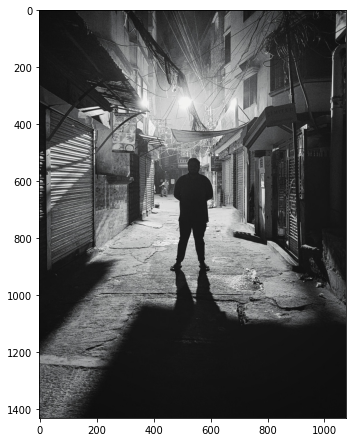

In [79]:
im = cv2.imread("me.jpeg")
#imgplot = plt.imshow(im)
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1])

In [32]:
cfg = get_cfg()
#cfg.MODEL.DEVICE = "cpu"

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")



model_final_f10217.pkl: 178MB [01:03, 2.81MB/s]                           
/home/yearat/miniconda3/envs/pytorch_p39/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/yearat/miniconda3/envs/pytorch_p39/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


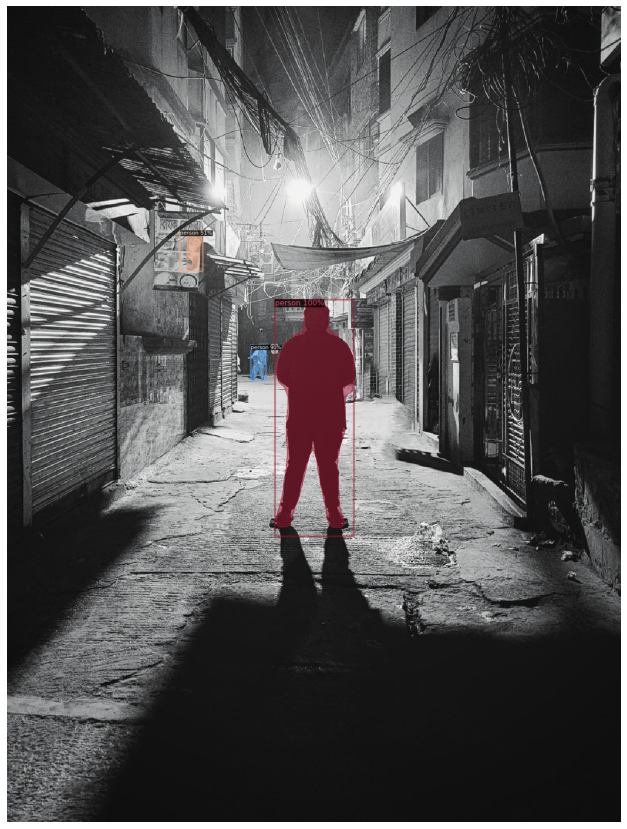

In [86]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(50,15)), plt.imshow(im), plt.axis('off');

v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
h = cv2_imshow(out.get_image()[:, :, ::-1])